In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dataset = pd.read_csv('data_new.csv')
print(dataset)

     openness_1  conscientiousness_1  extroversion_1  agreeableness_1   
0          4.33                 3.67            4.33             5.67  \
1          3.00                 4.67            4.00             3.00   
2          3.00                 3.67            3.33             3.33   
3          5.00                 5.00            5.00             7.00   
4          1.33                 2.67            2.67             3.33   
..          ...                  ...             ...              ...   
196        3.67                 5.00            3.00             3.67   
197        4.00                 3.67            4.33             3.67   
198        1.67                 3.00            3.00             3.33   
199        2.00                 3.33            3.33             3.33   
200        3.00                 3.67            6.33             5.00   

     neuroticism_1  anxietybasedperformancedeficits_1   
0             3.67                               2.29  \
1        

In [ ]:
X= dataset[['openness_1','conscientiousness_1','extroversion_1','agreeableness_1','neuroticism_1','anxietybasedperformancedeficits_1','exaggeratedsafetybehavior_1','hostilebehaviors_1','Gender_1','Age_1']]
Y= dataset['violations_1']

In [ ]:
print(X)
print(Y)

     openness_1  conscientiousness_1  extroversion_1  agreeableness_1   
0          4.33                 3.67            4.33             5.67  \
1          3.00                 4.67            4.00             3.00   
2          3.00                 3.67            3.33             3.33   
3          5.00                 5.00            5.00             7.00   
4          1.33                 2.67            2.67             3.33   
..          ...                  ...             ...              ...   
196        3.67                 5.00            3.00             3.67   
197        4.00                 3.67            4.33             3.67   
198        1.67                 3.00            3.00             3.33   
199        2.00                 3.33            3.33             3.33   
200        3.00                 3.67            6.33             5.00   

     neuroticism_1  anxietybasedperformancedeficits_1   
0             3.67                               2.29  \
1        

In [ ]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(201, 10) (160, 10) (41, 10)


SVM Model

In [ ]:
#Training the model
classifier= svm.SVC()

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC()

In [ ]:
#Model Evaluation

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.75625


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.5121951219512195


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train,X_train_prediction)

print(cm)

[[62 19]
 [20 59]]


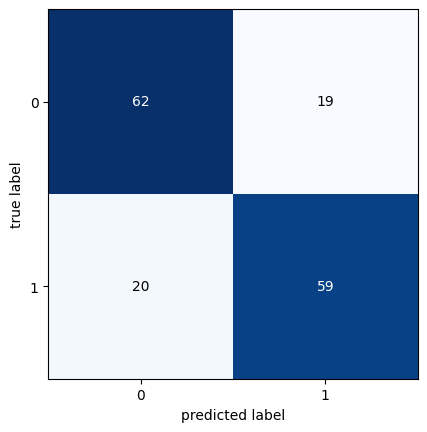

In [ ]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,X_test_prediction)

print(cm)

[[12  9]
 [11  9]]


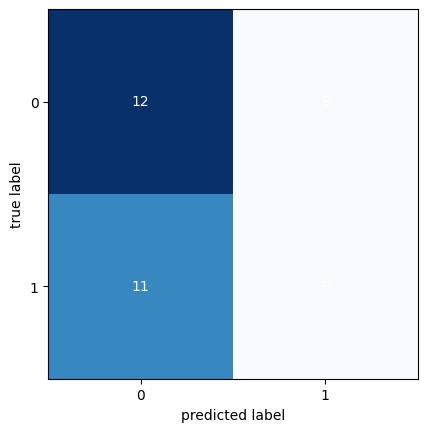

In [ ]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

random forest

In [ ]:
rf_Model=RandomForestClassifier(oob_score=True)

In [ ]:
rf_Model.fit(X_train,Y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
rf_Model.oob_score_

0.58125

In [ ]:
print (f'Train Accuracy - : {rf_Model.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.994
Test Accuracy - : 0.537


In [ ]:
y_pred = rf_Model.predict(X_train)
print(y_pred)

[2 1 1 2 1 2 2 2 1 1 2 2 1 2 2 1 1 1 1 2 2 1 2 1 2 2 1 1 1 2 1 1 2 2 2 1 2
 1 1 2 2 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1 1 1 2 2 1 2 1 1 1 2 1 2 2 1 1 2 2 1
 1 2 2 1 1 2 2 1 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2 2 2 1 2 1 2 1 1 2 1 2 1 1 1
 1 2 1 1 1 2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 2 1 1 1 2 1 2 2 1 1 2 1 2 2 2 1 2
 2 1 2 2 1 2 1 2 1 1 2 1]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train,y_pred)

print(cm)

[[81  0]
 [ 1 78]]


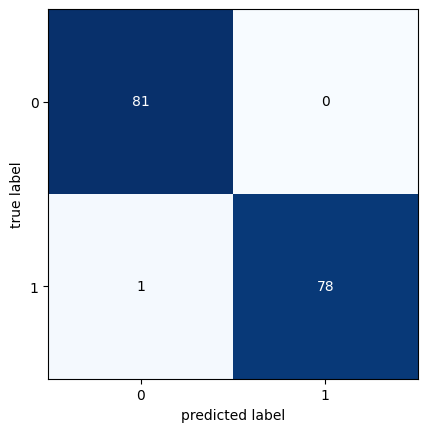

In [ ]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

In [ ]:
y_predt = rf_Model.predict(X_test)
print(y_predt)

[1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 2 1 2 1
 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,y_predt)

print(cm)

[[14  7]
 [12  8]]


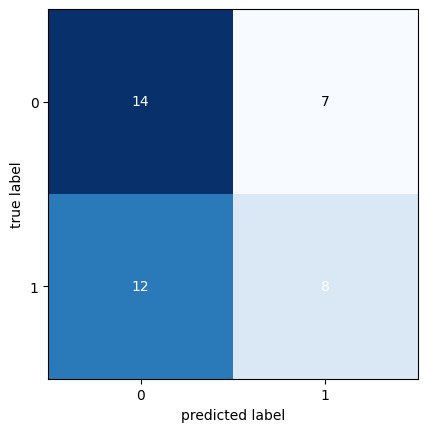

In [ ]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

ANN

In [ ]:
from keras import callbacks
import tensorflow 

from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.optimizers import SGD

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [30]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)



Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 0.5057 - accuracy: 0.3438
Epoch 2/10
5/5 [==============================] - 0s 0s/step - loss: 0.1840 - accuracy: 0.4875
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: -0.1254 - accuracy: 0.5063
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: -0.4192 - accuracy: 0.5063
Epoch 5/10
5/5 [==============================] - 0s 0s/step - loss: -0.7200 - accuracy: 0.5063
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: -1.0522 - accuracy: 0.5063
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: -1.3981 - accuracy: 0.5063
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: -1.7862 - accuracy: 0.5063
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: -2.2333 - accuracy: 0.5063
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: -2.7302 - accuracy: 0.5063


In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

2/2 [==============================] - 0s 16ms/step - loss: -2.3976 - accuracy: 0.5122
Test Loss: -2.397599458694458
Test Accuracy: 0.5121951103210449


In [32]:
# input_data = (3,3.67,6.33,5,2.67,4.57,3.71,3.57,1,1)

# # changing the input data to a numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the data as we are predicting the label for only one instance

# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = model.predict(input_data_reshaped)
# print(prediction)

# if(prediction == 1).any():
#   print('The person does not violates')

# else:
#   print('The person violate')

In [33]:
#Importing essential libraries
from flask import Flask, render_template, request
import pickle
import numpy as np

# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, classification_report


# Load the Random Forest CLassifier model
# filename = 'heart-disease-prediction-knn-model.pkl'
# model = pickle.load(open(filename, 'rb'))

app = Flask(__name__,template_folder=r'C:\Users\Olivia\Downloads\Project html\templates')
@app.route('/')
def home():
    return render_template('interface.html')


@app.route('/predict', methods=['POST','GET'])
def predict():
    if request.method == 'POST':

        openness_1 = float(request.form['openness'] )
        conscientiousness_1 = float(request.form['conscientiousness'])
        extroversion_1 = float(request.form['extroversion'])
        agreeableness_1 = float(request.form['agreeableness'])
        neuroticism_1 = float(request.form['neuroticism'])
        anxietybasedperformancedeficits_1 = float(request.form['anxietybasedperformancedeficits'])
        exaggeratedsafetybehavior_1 = float(request.form['exaggeratedsafetybehavior'])
        hostilebehaviors_1 = float(request.form['hostilebehaviors'])
        Gender_1 = int(request.form['Gender'])
        Age_1 = int(request.form['Age'])
       
        
        data = np.array([[openness_1,conscientiousness_1,extroversion_1,agreeableness_1,neuroticism_1,anxietybasedperformancedeficits_1,exaggeratedsafetybehavior_1,hostilebehaviors_1,Gender_1,Age_1]])
        # input_data = (3,3.67,6.33,5,2.67,4.57,3.71,3.57,1,1)

        # changing the input data to a numpy array
        # input_data_as_numpy_array = np.asarray(data)

        # reshape the data as we are predicting the label for only one instance

        # input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

        prediction = rf_Model.predict(data)
        print(prediction)

        if(prediction == 1).any():
          print('The person does not violates')

        else:
          print('The person violate')

        #         my_prediction = rf_Model.predict(data)
        #         print(my_prediction)

        #         if(prediction == 1):
        #           print('The person does not violates')
        #         elif(prediction == 2):
        #           print('The person may violate')
        #         else:
        #           print('The person violate')
                
        #         print('\nClassification Report\n', classification_report(y_test, data))
                
        return render_template('Interface2.html', prediction = prediction)
        # return 'None'
        # #
  
if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\python\python 3.9.1\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [23/May/2023 23:22:27] "POST /predict HTTP/1.1" 200 -


[2]
The person violate
